In [1]:
# 关于异常值的处理，cement-strength-eda-and-prediction代码仅进行了基本的对数变换.
# 这里补充2σ、3σ以及基于箱线图的方法.

#### 补充内容1：2σ准则与3σ准则

`2σ`和`3σ`方法（也称为“两个标准差法”和“三个标准差法”）是统计学中常用的基于正态分布的规则，通常用于数据分析中的异常值检测和质量控制。

##### 定义

1. **σ（Sigma）**：表示标准差，是描述数据分散程度的一种统计量。它反映了数据点与均值的偏离程度。

2. **2σ 方法**：
   - 在满足正态分布的假设下，大约有 95.4% 的数据点将位于均值±2σ 的范围内。这意味着如果数据是正态分布的，那么绝大多数的数据点会落在这个范围内。
   - 使用 `2σ` 方法时，如果一个数据点落在均值±2σ 的范围之外，则可能被视为异常值。

3. **3σ 方法**：
   - 在正态分布的情况下，大约有 99.7% 的数据点将位于均值±3σ 的范围内。
   - 当使用 `3σ` 方法时，如果一个数据点落在均值±3σ 的范围之外，则它更有可能被视为异常值。

##### 应用

- **异常值检测**：在数据集中，使用这两种方法可以有效地识别潜在的异常值（outliers）。如果数据点超过了 2σ 或 3σ 的范围，可以进一步分析这些数据行以检查数据录入错误、设备故障或其他异乎寻常的情况。

- **质量控制**：在制造和其他行业，`2σ` 和 `3σ` 方法常用于控制图（control charts）中，以监控过程的稳定性和产品质量。当数据超出这些范围时，可以进行调查和改进。

##### 计算示例

假设有一组数据，且已计算出均值和标准差：

- 均值（Mean）= μ
- 标准差（Standard Deviation）= σ

- **2σ 范围**：`[μ - 2σ, μ + 2σ]`
- **3σ 范围**：`[μ - 3σ, μ + 3σ]`

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

config = {'font.family': 'serif', 'font.serif': ['Times New Roman']}
plt.rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False

d:\installation\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
d:\installation\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
df = pd.read_csv('./Dataset/Concrete Compressive Strength.csv')

print(df.shape)
df.head()

(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


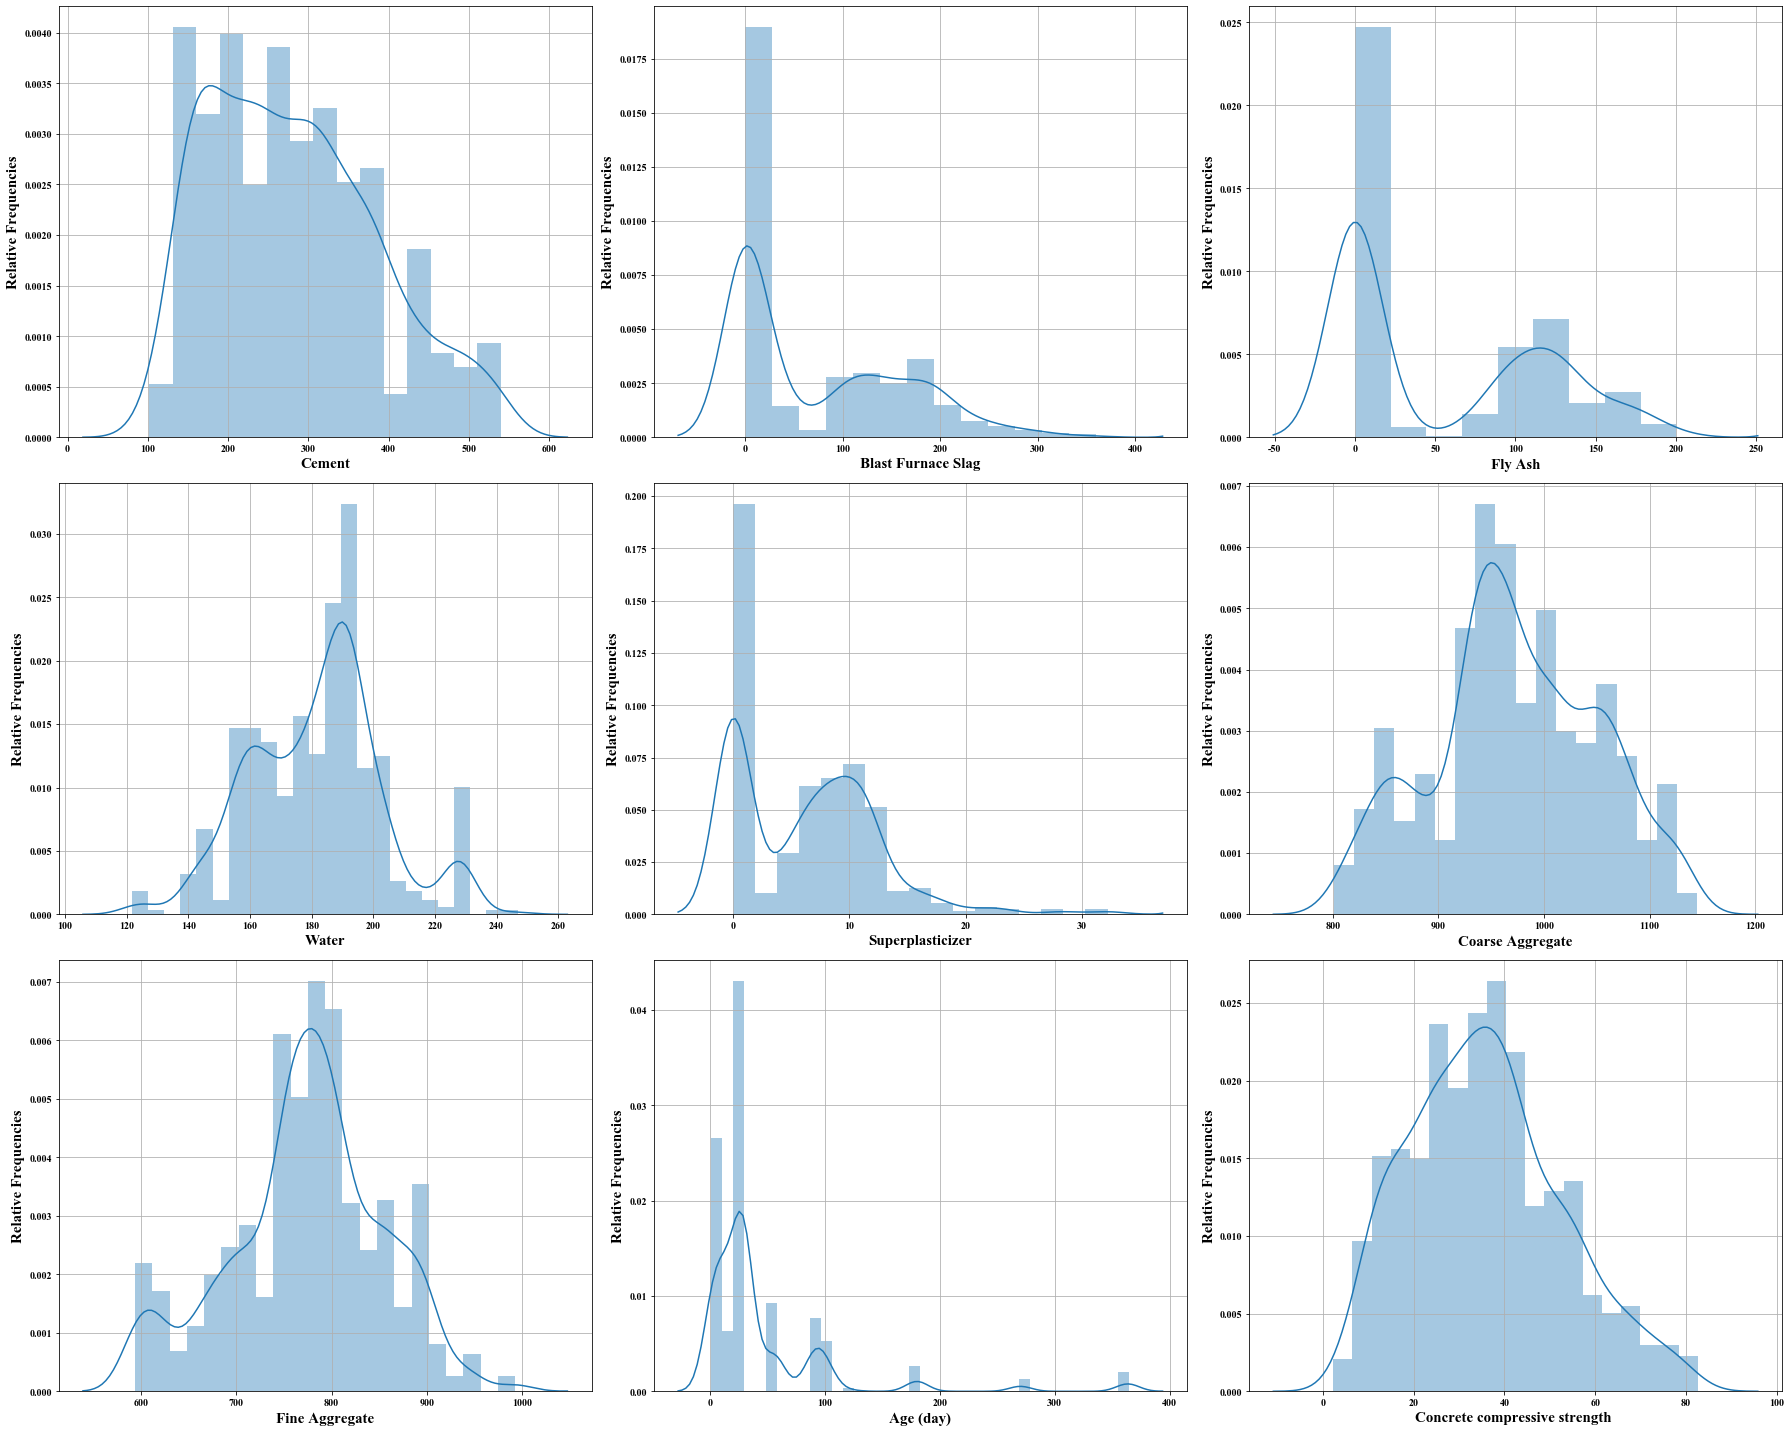

In [ ]:
plt.figure(figsize=(25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        # 使用 histplot 绘制直方图.
        sns.distplot(df[col], kde=True, ax=ax)  # kde=True 添加核密度估计图.
        plt.grid(True)
        plt.xlabel(col, fontsize=15)
        plt.ylabel('Relative Frequencies', fontsize=15)
    plotnumber += 1

plt.tight_layout()
# plt.savefig('./Appendix-files/histgrams.png', dpi=600)  # 保存为 PNG 格式，分辨率为 600 DPI
plt.show()

可以看到，上述各特征以及目标变量的分布情况。其中，目标变量(Concrete sompressive streagth)近似于正态分布。这里对其进行正态分布的假设检验；可以通过 Shapiro-Wilk 检验、Kolmogorov-Smirnov 检验等统计方法检验目标变量的正态性。对于不满足正态分布的目标变量，可能需要进行数据转换（如对数变换、平方根变换等）来改善其分布形态，从而使其更接近正态分布。

In [14]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [22]:
# 计算均值与标准差.
cm_strehgth_mean = df['Concrete compressive strength '].mean()
cm_strehgth_std = df['Concrete compressive strength '].std()

# 利用ks检验.
kstest_stat, ketest_p = stats.kstest(df['Concrete compressive strength '], 'norm', (cm_strehgth_mean, cm_strehgth_std))

# KstestResult(statistic=0.04130255202623645, pvalue=0.05789468434549417)
# print(f'KS检验统计值: {kstest_out[0]:.2f}, p值: {kstest_out[1]:.2f}')

"""
检验统计值 (ks_stat)：
是KS检验的统计量，表示样本分布与理论分布（在这里是标准正态分布）之间的最大差距。具体来说，它是样本累积分布函数（CDF）与理论分布累积分布函数之间的最大绝对差值。
该值越大，表示样本分布与理论分布之间的差异越显著。这个值一般在0到1之间。

p值 (ks_p)：
是与检验统计值相关的p值，表示结果在原假设为真时出现的概率。在Kolmogorov-Smirnov检验中，原假设是“样本来自给定的理论分布（在这里是正态分布）。
如果p值小于显著性水平（通常为0.05），则拒绝原假设，说明样本数据显著不符合理论分布；如果p值大于显著性水平，则不能拒绝原假设，说明没有足够的证据表明样本数据与理论分布存在显著差异。
"""

# 输出结果
print("Kolmogorov-Smirnov检验统计值:", kstest_stat)
print("Kolmogorov-Smirnov检验p值:", ketest_p)
if ketest_p < 0.05:
    print("拒绝原假设：数据不符合正态分布")
else:
    print("未拒绝原假设：数据可能符合正态分布")

##############################################################
print("#"*40)
# 利用Shapiro-Wilk检验
shapiro_stat, shapiro_p = stats.shapiro(df['Concrete compressive strength '])

# 输出Shapiro-Wilk检验结果，格式保留两位小数
print(f'Shapiro-Wilk检验统计值: {shapiro_stat:.2f}, p值: {shapiro_p:.2f}')
if shapiro_p < 0.05:
    print("Shapiro-Wilk检验：拒绝原假设，数据不符合正态分布")
else:
    print("Shapiro-Wilk检验：未拒绝原假设，数据可能符合正态分布")

Kolmogorov-Smirnov检验统计值: 0.04130255202623645
Kolmogorov-Smirnov检验p值: 0.05789468434549417
未拒绝原假设：数据可能符合正态分布
########################################
Shapiro-Wilk检验统计值: 0.98, p值: 0.00
Shapiro-Wilk检验：拒绝原假设，数据不符合正态分布


不同的正态检验方法（如Kolmogorov-Smirnov检验和Shapiro-Wilk检验）可能会对同一数据集给出不同的结论，这是因为它们的假设和敏感性不同。 所以，进一步结合上述特征分布图，我们仍假设目标列服从正态并做如下对比：

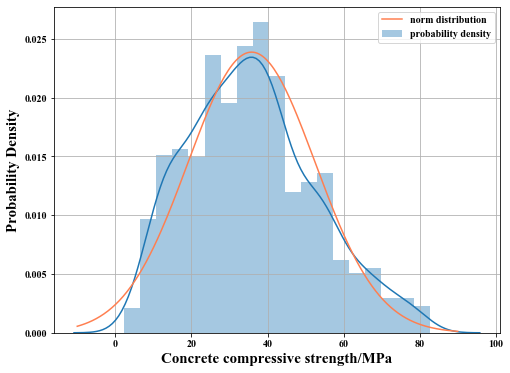

In [31]:
# 对比其与真实正态分布之间的差异.
fig = plt.figure(figsize=(8,6))

sns.distplot(df['Concrete compressive strength '], kde=True, label='probability density')

data_x = np.linspace(-10,90,200)
data_x_norm = [stats.norm.pdf(i, cm_strehgth_mean, cm_strehgth_std) for i in data_x] 
plt.plot(data_x, data_x_norm, color='coral', label='norm distribution')

plt.xlabel('Concrete compressive strength/MPa', fontsize=15)
plt.ylabel('Probability Density',fontsize=15) 
plt.grid(True)
plt.legend()
plt.show()

#### 利用2σ、3σ准则去除异常值

In [38]:
# 计算上下限.
lower_limit = cm_strehgth_mean - 2 * cm_strehgth_std
upper_limit = cm_strehgth_mean + 2 * cm_strehgth_std

# 利用2σ准则去除异常值.
df_filtered = df[(df['Concrete compressive strength '] >= lower_limit) &
                 (df['Concrete compressive strength '] <= upper_limit)]
print(df_filtered.shape)
df_filtered.info()

(990, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          990 non-null    float64
 1   Blast Furnace Slag              990 non-null    float64
 2   Fly Ash                         990 non-null    float64
 3   Water                           990 non-null    float64
 4   Superplasticizer                990 non-null    float64
 5   Coarse Aggregate                990 non-null    float64
 6   Fine Aggregate                  990 non-null    float64
 7   Age (day)                       990 non-null    int64  
 8   Concrete compressive strength   990 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 77.3 KB


In [39]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,990.0,276.389697,102.330802,102.000000,190.425000,257.700000,339.200000,540.000000
Blast Furnace Slag,990.0,71.486010,85.523915,0.000000,0.000000,20.000000,139.975000,359.400000
Fly Ash,990.0,55.988636,64.276513,0.000000,0.000000,0.000000,118.270000,200.100000
Water,990.0,182.322980,21.229292,121.750000,166.610000,185.700000,192.940000,247.000000
Superplasticizer,990.0,6.017136,5.839389,0.000000,0.000000,6.050000,10.000000,32.200000
Coarse Aggregate,990.0,973.669747,77.428554,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,990.0,774.432374,80.608270,594.000000,730.100000,780.090000,825.000000,992.600000
Age (day),990.0,44.964646,63.654415,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete compressive strength,990.0,34.304140,15.019110,3.319827,23.360481,33.687797,44.278149,68.750607


In [40]:
# 计算上下限.
lower_limit = cm_strehgth_mean - 3 * cm_strehgth_std
upper_limit = cm_strehgth_mean + 3 * cm_strehgth_std

# 利用2σ准则去除异常值.
df_filtered_3sigma = df[(df['Concrete compressive strength '] >= lower_limit) &
                 (df['Concrete compressive strength '] <= upper_limit)]

print(df_filtered_3sigma.shape)
df_filtered_3sigma.info()

(1030, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 80.5 KB


In [41]:
df_filtered_3sigma.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete compressive strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


#### 利用箱线图方法去除异常值

上述方法，要求数据服从或近似服从正态分布。箱线图方法无此要求；

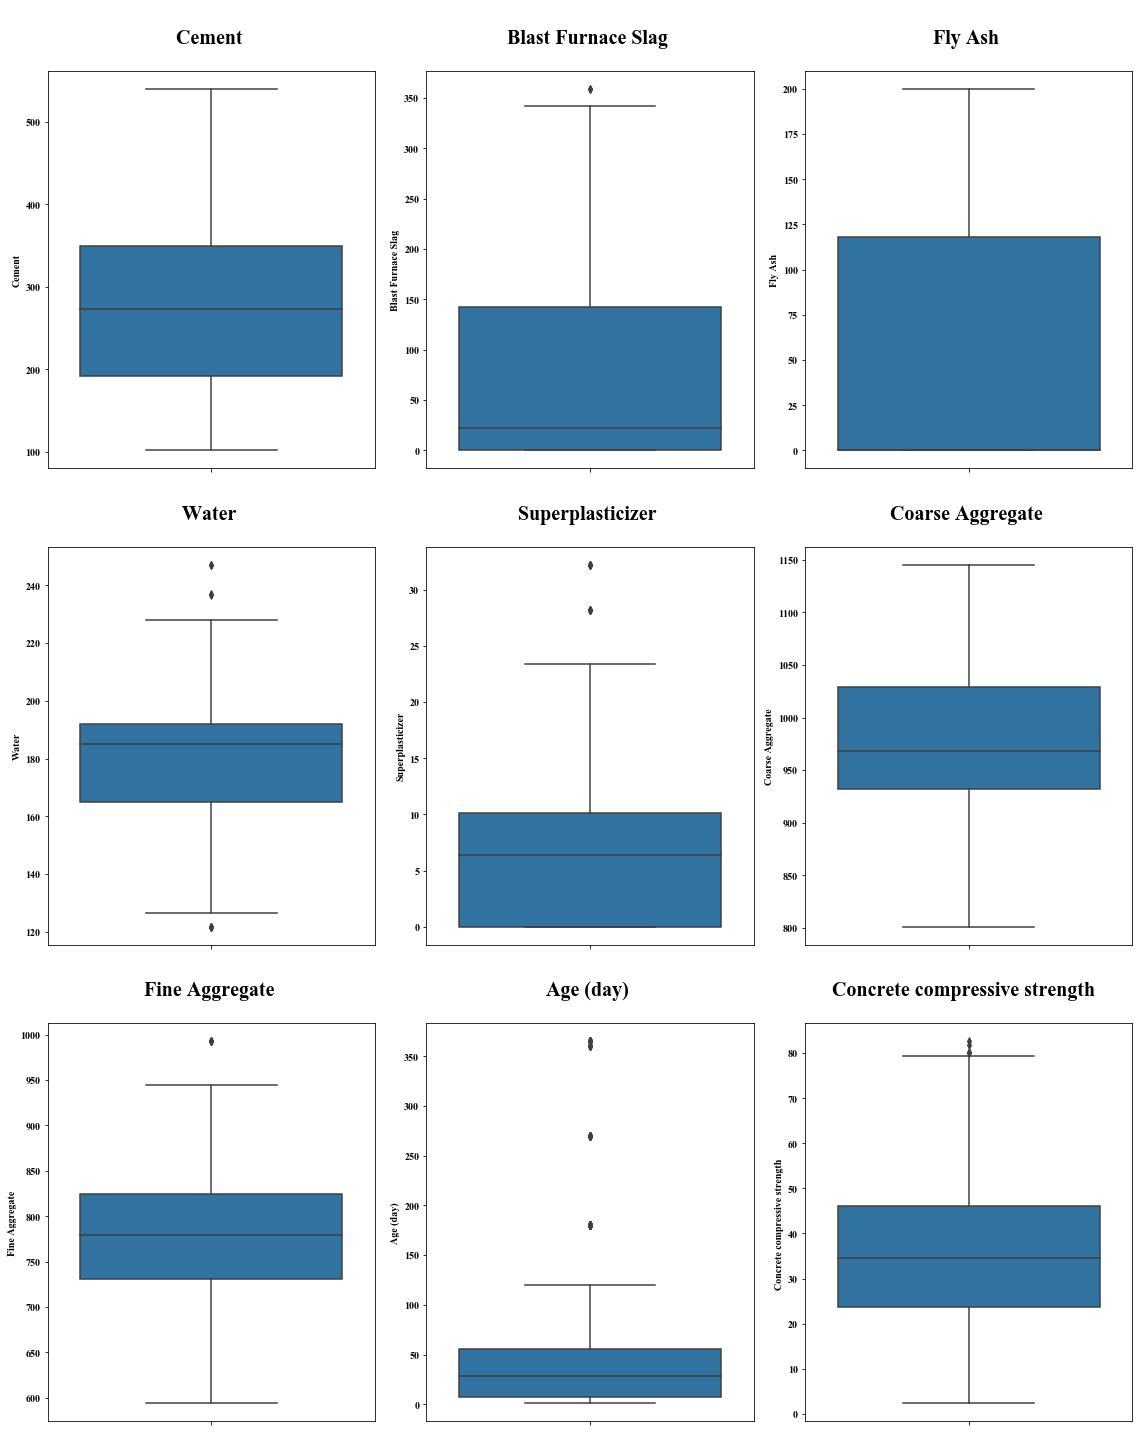

In [43]:
# 首先对原始数据绘制箱线图.
cols = df.columns

plt.figure(figsize = (16, 20))
plotnumber = 1
for i in range(0, len(cols)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(data = df, y = cols[i],  ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()